In [1]:
# hide the warning messages
#import warnings
#from sklearn.exceptions import ConvergenceWarning
#warnings.simplefilter("ignore", ConvergenceWarning)

# 1) Distribution of the residues from a MLP regressor

c:\Users\diogo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\diogo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\diogo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\diogo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the opti

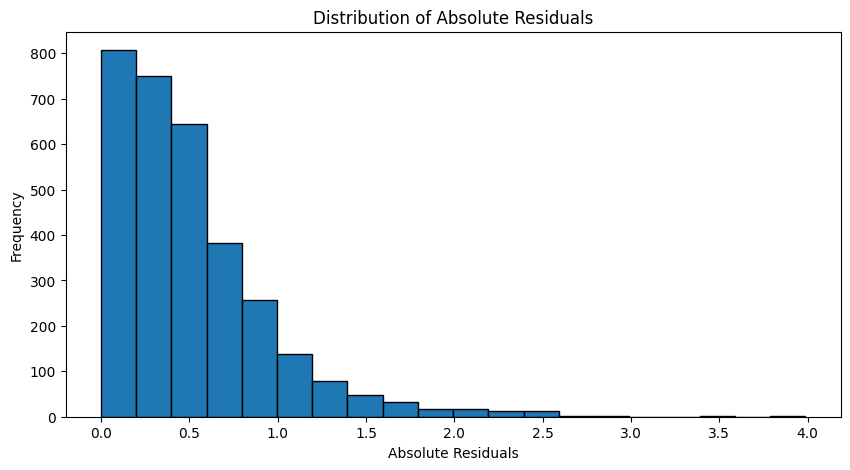

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

# Reading the CSV file
df = pd.read_csv("winequality-red.csv", sep = ';')
X = df.drop(["quality"], axis=1)
y = df["quality"]

n_runs = 10
pred_values = []
test_values = []

for run in range(n_runs):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Create and train the MLP regressor
    mlp = MLPRegressor(hidden_layer_sizes=(10, 10), activation='relu', early_stopping=True, validation_fraction=0.2, random_state=run+1)#, max_iter=350)
    mlp.fit(X_train, y_train)

    # Predict on the test set
    y_pred = mlp.predict(X_test)

    # Store the values so they can be used in the next question
    test_values.extend(y_test)
    pred_values.extend(y_pred)

# Calculate the absolute residuals
residuals = np.abs(np.array(test_values) - np.array(pred_values))

plt.figure(figsize=(10,5))
plt.hist(residuals, bins=20, edgecolor='k')
plt.xlabel('Absolute Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Absolute Residuals')
plt.show()

# 2) Impact of round and bound estimates on the MAE of the MLP learnt in previous question

In [3]:
# Round and bound the predictions
pred_rounded = np.round(pred_values)  # Round to the nearest integer
pred_bounded = np.clip(pred_rounded, a_min=3, a_max=8)  # Bound predictions between 3 and 8 (there are only quality values between 3 and 8 in csv file)

# Calculate the absolute residuals for rounded and bounded the predictions
residuals_new = np.abs(np.array(test_values) - np.array(pred_bounded))

# Calculate the MAEs
mae = np.mean(residuals)
print("MAE for previous exercise:", mae)

mae = np.mean(residuals_new)
print("MAE for rounded and bounded predictions:", mae)

MAE for previous exercise: 0.5097171955009514
MAE for rounded and bounded predictions: 0.43875


### Comment about results
By rounding and bounding the estimates, it is observed that the MAE (Mean Absolute Error) reduces in relation to the previous exercise, which indicates that there was a better performance of this new model